In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

folder_path = '/content/drive/MyDrive/SmartCity/Station Ochtrup/'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each CSV file and attempt to read it
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path, delimiter = ";")
        dfs.append(df)
    except pd.errors.ParserError as e:
        print(f"Error reading {file_path}: {e}")

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
df = combined_df.dropna()

# Convert columns to the appropriate numeric types
numeric_columns = [
    '2m Lufttemperatur [degC] (tas)',
    'spezifische Luftfeuchtigkeit [kg/kg] (huss)',
    'Niederschlagsmenge [mm] (pr)',
    'Windgeschwindigkeit in 2m [m/s] (sfcWind)',
    'maximale Windgeschwindigkeit [m/s] (wsgsmax)',
    'u-Windkomponente [m/s] (uas)',
    'v-Windkomponente [m/s] (vas)',
    'Bodenfeuchte in 5cm Tiefe [vol%]',
    'Bodenfeuchte in 15cm Tiefe [vol%]',
    'Bodenfeuchte in 30cm Tiefe [vol%]',
    'Bodenfeuchte in 60cm Tiefe [vol%]',
    'Bodentemperatur in 5cm Tiefe [degC]',
    'Bodentemperatur in 15cm Tiefe [degC]',
    'Bodentemperatur in 30cm Tiefe [degC]',
    'Bodentemperatur in 60cm Tiefe [degC]',
    'Matrixpotential in 30cm Tiefe [kPa]',
    'Bodenfeuchte aus CRNS [vol%] (mrso)'
]

for column in numeric_columns:
    # Replace commas with dots and then convert to numeric
    df[column] = pd.to_numeric(df[column].str.replace(',', '.'), errors='coerce')


# Convert 'Timestamp[UTC]' to datetime
df['Timestamp[UTC]'] = pd.to_datetime(df['Timestamp[UTC]'])

# Now, the DataFrame has the appropriate numeric types
df.head()

<ipython-input-2-7d64b44079af>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column].str.replace(',', '.'), errors='coerce')
<ipython-input-2-7d64b44079af>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp[UTC]'] = pd.to_datetime(df['Timestamp[UTC]'])


,Timestamp[UTC],2m Lufttemperatur [degC] (tas),Stations-Luftdruck [Pa] (ps),relative Luftfeuchtigkeit [%] (hurs),spezifische Luftfeuchtigkeit [kg/kg] (huss),Niederschlagsmenge [mm] (pr),Windgeschwindigkeit in 2m [m/s] (sfcWind),Windrichtung [deg],maximale Windgeschwindigkeit [m/s] (wsgsmax),u-Windkomponente [m/s] (uas),...,Bodenfeuchte in 15cm Tiefe [vol%],Bodenfeuchte in 30cm Tiefe [vol%],Bodenfeuchte in 60cm Tiefe [vol%],Bodentemperatur in 5cm Tiefe [degC],Bodentemperatur in 15cm Tiefe [degC],Bodentemperatur in 30cm Tiefe [degC],Bodentemperatur in 60cm Tiefe [degC],Matrixpotential in 30cm Tiefe [kPa],Bodenfeuchte aus CRNS [vol%] (mrso),Neutronen Anzahl [N/h]
175,2023-11-08 07:00:00,8.0,100420.0,88.0,0.0058,0.00,2.2,252.0,5.3,-2.10,...,28.6,28.4,28.4,10.3,10.6,11.2,11.9,-10.9,36.4,1197.0
209,2023-11-09 17:00:00,9.3,99073.0,81.0,0.0060,0.00,1.5,246.0,3.4,-1.35,...,30.7,30.1,30.1,10.7,10.8,11.1,11.7,-10.9,37.7,1454.0
251,2021-07-01 00:00:00,13.4,100527.0,98.0,0.0094,0.00,0.7,338.0,2.1,0.68,...,18.9,24.3,21.7,17.6,18.2,18.5,17.3,-12.0,24.7,1499.0
252,2021-07-01 01:00:00,13.3,100510.0,99.0,0.0094,0.00,0.5,284.0,1.3,0.12,...,18.9,24.3,21.7,17.4,18.1,18.4,17.3,-12.0,24.6,1439.0
253,2021-07-01 02:00:00,13.2,100520.0,99.0,0.0093,0.07,0.5,323.0,1.7,0.37,...,18.9,24.3,21.7,17.3,17.9,18.3,17.3,-11.9,25.1,1487.0


In [ ]:
# Convert the 'Timestamp[UTC]' column to datetime format
df['Timestamp[UTC]'] = pd.to_datetime(df['Timestamp[UTC]'])

# Sort the DataFrame based on the timestamp
df.sort_values(by='Timestamp[UTC]', inplace=True)

# Set the 'Timestamp[UTC]' column as the index
df.set_index('Timestamp[UTC]', inplace=True)

# Calculate rolling mean with a window size of 24 hours
rolling_mean_df = df.rolling(window='24H').mean()

# Add suffix "_mean" to the column names
rolling_mean_df.columns = [col + '_mean' for col in rolling_mean_df.columns]
rolling_mean_df['Bodenfeuchte in 5cm Tiefe [vol%]_24h_lag'] = rolling_mean_df['Bodenfeuchte in 5cm Tiefe [vol%]_mean'].shift(24)

# Fill NaN values in the new column with the original values
rolling_mean_df['Bodenfeuchte in 5cm Tiefe [vol%]_24h_lag'].fillna(rolling_mean_df['Bodenfeuchte in 5cm Tiefe [vol%]_mean'], inplace=True)

# Display the resulting DataFrame
rolling_mean_df

<ipython-input-3-eb4dee92a6d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp[UTC]'] = pd.to_datetime(df['Timestamp[UTC]'])
<ipython-input-3-eb4dee92a6d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Timestamp[UTC]', inplace=True)


,2m Lufttemperatur [degC] (tas)_mean,Stations-Luftdruck [Pa] (ps)_mean,relative Luftfeuchtigkeit [%] (hurs)_mean,spezifische Luftfeuchtigkeit [kg/kg] (huss)_mean,Niederschlagsmenge [mm] (pr)_mean,Windgeschwindigkeit in 2m [m/s] (sfcWind)_mean,Windrichtung [deg]_mean,maximale Windgeschwindigkeit [m/s] (wsgsmax)_mean,u-Windkomponente [m/s] (uas)_mean,v-Windkomponente [m/s] (vas)_mean,...,Bodenfeuchte in 30cm Tiefe [vol%]_mean,Bodenfeuchte in 60cm Tiefe [vol%]_mean,Bodentemperatur in 5cm Tiefe [degC]_mean,Bodentemperatur in 15cm Tiefe [degC]_mean,Bodentemperatur in 30cm Tiefe [degC]_mean,Bodentemperatur in 60cm Tiefe [degC]_mean,Matrixpotential in 30cm Tiefe [kPa]_mean,Bodenfeuchte aus CRNS [vol%] (mrso)_mean,Neutronen Anzahl [N/h]_mean,Bodenfeuchte in 5cm Tiefe [vol%]_24h_lag
Timestamp[UTC],,,,,,,,,,,,,,,,,,,,,
2021-06-01 00:00:00,13.300000,101262.00,48.000000,0.004600,0.000,0.800000,91.000000,1.500000,0.030000,0.7500,...,22.90,21.300000,15.200,16.00,15.300000,12.600000,-16.400000,26.30,1322.000000,27.800000
2021-06-01 01:00:00,12.900000,101260.00,50.000000,0.004600,0.000,0.900000,97.000000,1.750000,-0.095000,0.8450,...,22.90,21.350000,14.950,15.80,15.250000,12.550000,-16.500000,26.50,1381.000000,27.850000
2021-06-01 02:00:00,12.566667,101255.00,51.666667,0.004633,0.000,0.966667,98.666667,1.933333,-0.146667,0.9200,...,22.90,21.366667,14.700,15.60,15.166667,12.533333,-16.533333,26.60,1372.333333,27.866667
2021-06-01 03:00:00,12.275000,101246.25,53.250000,0.004675,0.000,0.950000,99.000000,1.975000,-0.157500,0.9175,...,22.90,21.375000,14.475,15.40,15.075000,12.525000,-16.575000,26.55,1372.000000,27.875000
2021-06-01 04:00:00,12.220000,101244.60,54.400000,0.004760,0.000,0.900000,110.000000,1.920000,-0.212000,0.7980,...,22.90,21.380000,14.260,15.22,15.000000,12.520000,-16.600000,26.52,1378.200000,27.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-27 06:00:00,8.300000,98470.00,95.000000,0.006600,0.650,1.700000,87.000000,3.200000,1.730000,0.0800,...,28.30,28.300000,11.700,11.90,12.500000,13.000000,-10.900000,36.10,1500.000000,29.833333
2023-10-29 18:00:00,12.400000,98710.00,85.000000,0.007700,1.630,2.500000,248.000000,6.200000,-2.310000,-0.9300,...,29.00,29.000000,12.400,12.40,12.400000,12.700000,-10.900000,33.90,1611.000000,29.816667
2023-10-29 19:00:00,11.550000,98745.00,87.500000,0.007500,2.515,2.550000,249.500000,6.100000,-2.395000,-0.9000,...,29.45,29.450000,12.350,12.35,12.450000,12.700000,-10.900000,33.90,1478.000000,29.785714


In [ ]:
rolling_mean_df.to_excel("test.xlsx")

In [ ]:
# Columns to drop
columns_to_drop = ["Neutronen Anzahl [N/h]_mean", "Bodenfeuchte aus CRNS [vol%] (mrso)_mean","Matrixpotential in 30cm Tiefe [kPa]_mean", 'Bodenfeuchte in 15cm Tiefe [vol%]_mean', 'Bodenfeuchte in 30cm Tiefe [vol%]_mean', 'Bodenfeuchte in 60cm Tiefe [vol%]_mean']

# Drop specified columns
rolling_mean_df = rolling_mean_df.drop(columns=columns_to_drop)
rolling_mean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11243 entries, 2021-06-01 00:00:00 to 2023-11-09 17:00:00
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   2m Lufttemperatur [degC] (tas)_mean                11243 non-null  float64
 1   Stations-Luftdruck [Pa] (ps)_mean                  11243 non-null  float64
 2   relative Luftfeuchtigkeit [%] (hurs)_mean          11243 non-null  float64
 3   spezifische Luftfeuchtigkeit [kg/kg] (huss)_mean   11243 non-null  float64
 4   Niederschlagsmenge [mm] (pr)_mean                  11243 non-null  float64
 5   Windgeschwindigkeit in 2m [m/s] (sfcWind)_mean     11243 non-null  float64
 6   Windrichtung [deg]_mean                            11243 non-null  float64
 7   maximale Windgeschwindigkeit [m/s] (wsgsmax)_mean  11243 non-null  float64
 8   u-Windkomponente [m/s] (uas)_mean                  

In [ ]:
!pip install interpret
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

# Assuming 'df' is your DataFrame with the cleaned and numeric data
target_column = 'Bodenfeuchte in 5cm Tiefe [vol%]_mean'

# Define features and target
X = rolling_mean_df.drop(columns=[target_column])
y = rolling_mean_df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create ExplainableBoostingRegressor model
ebr = ExplainableBoostingRegressor()
ebr.fit(X_train, y_train)

# Predict on the test set
y_pred = ebr.predict(X_test)

# Calculate mean absolute error
mae = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mae}')

# Explain the model
ebm_global = ebr.explain_global()

# Show feature importance
show(ebm_global)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 108.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.8 MB/s eta 0:00:00


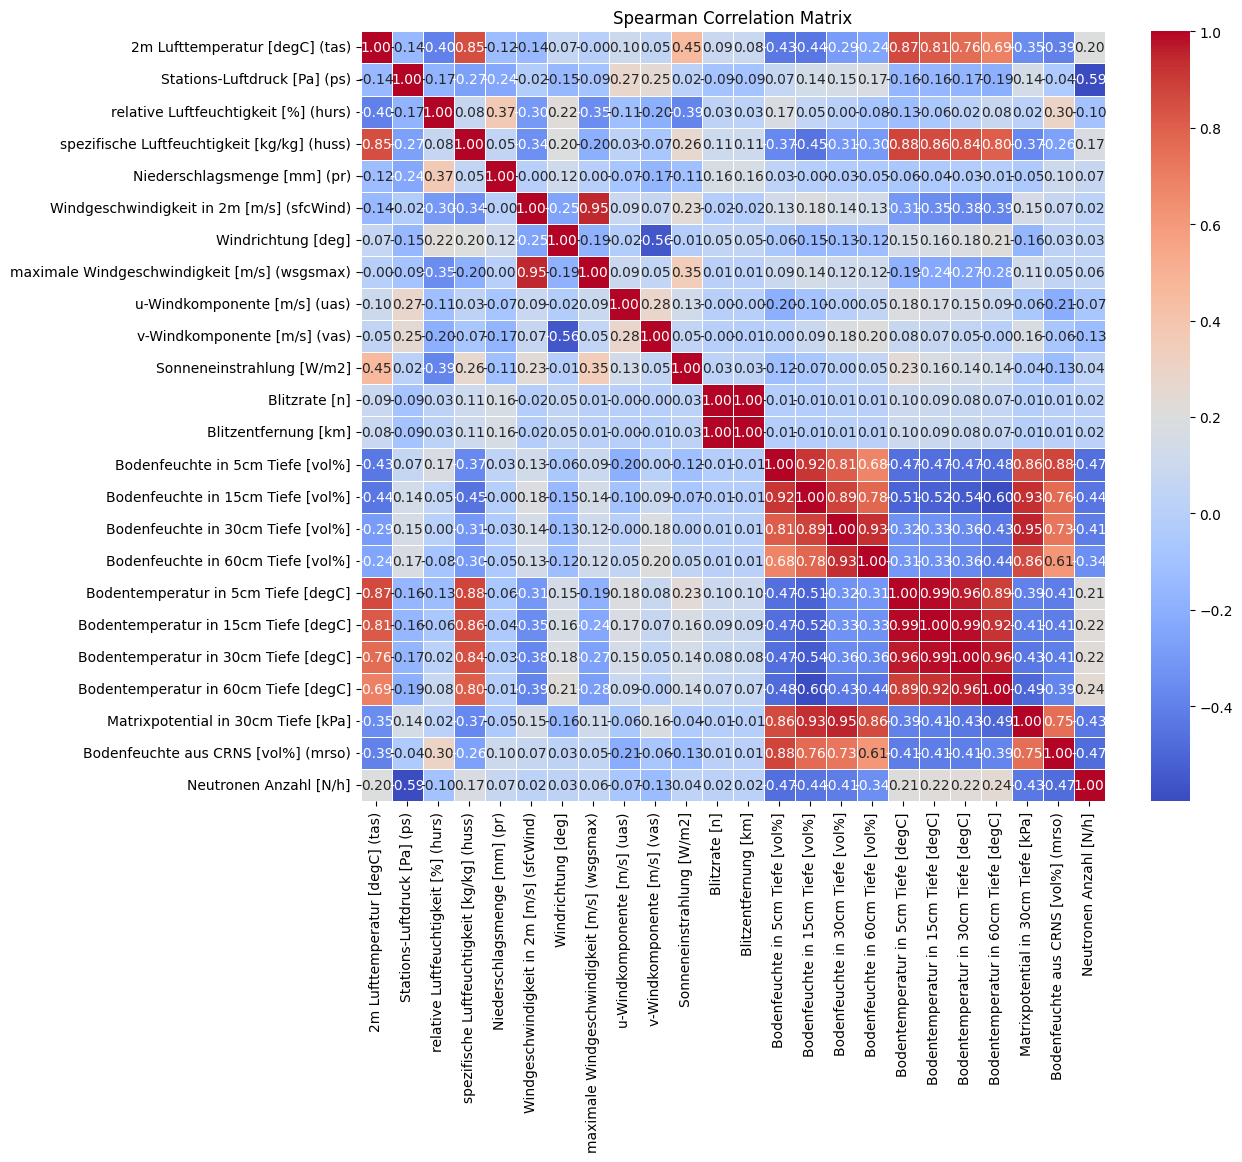

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
spearman_corr_matrix = df.corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Spearman Correlation Matrix')

# Show the plot
plt.show()

Mean Squared Error: 3.473265493461531


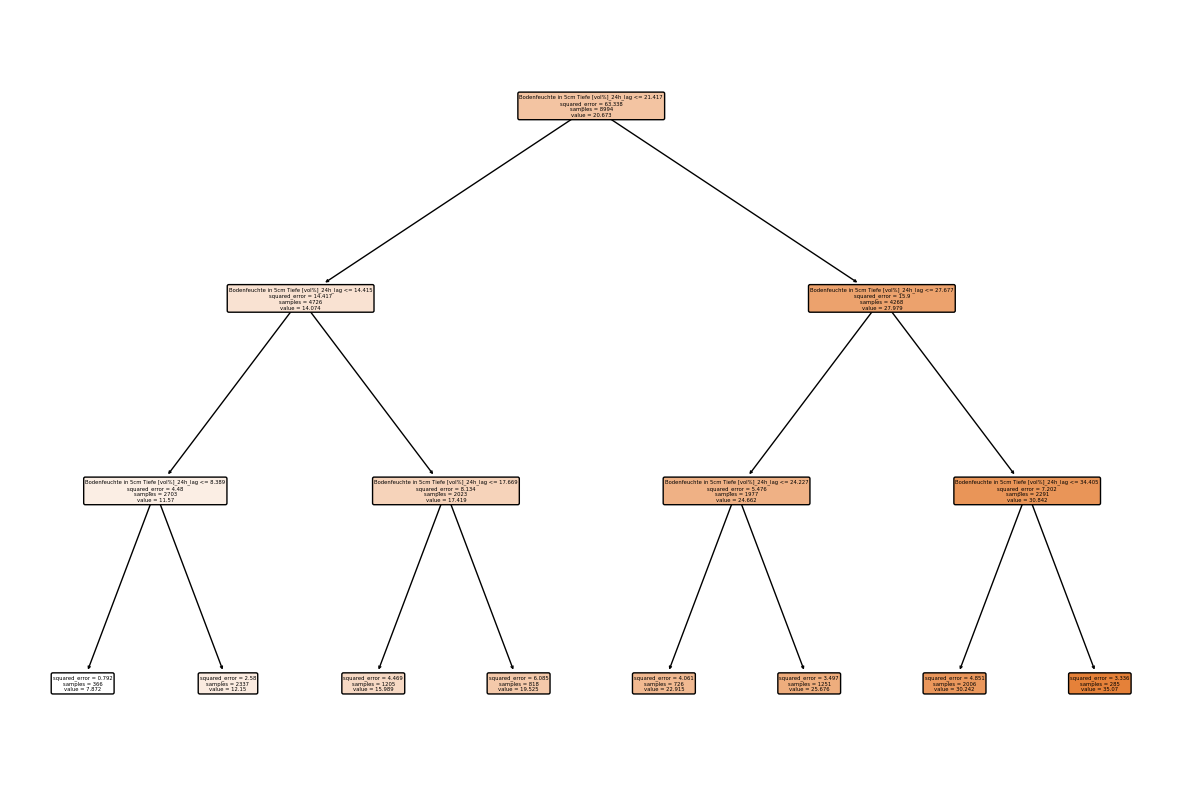

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with the cleaned and numeric data
target_column = 'Bodenfeuchte in 5cm Tiefe [vol%]_mean'

# Define features and target
X = rolling_mean_df.drop(columns=[target_column])
y = rolling_mean_df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree Regressor model with max_depth=5
dt_model = DecisionTreeRegressor(max_depth=3)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()
